In [1]:
#importing necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotnine as p9
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.preprocessing import FunctionTransformer,OneHotEncoder, StandardScaler, normalize, LabelEncoder, MinMaxScaler
from xgboost import plot_importance
from sklearn.utils import resample
from sklearn import metrics
from scipy.stats import chi2_contingency
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from scipy import stats 


# Uploading the Data

Data Information
1. Age: age of the patient [years]
2. Sex: sex of the patient [M: Male, F: Female]
3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. RestingBP: resting blood pressure [mm Hg]
5. Cholesterol: serum cholesterol [mm/dl]
6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10. Oldpeak: oldpeak = ST [Numeric value measured in depression]
11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12. HeartDisease: output class [1: heart disease, 0: Normal]

In [2]:
#uploading the document
df=pd.read_csv('../../heart.csv')

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# Cleaning and Understanding Data

In [4]:
#shows all the columns that we have
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [5]:
#gives the types of the columns that we have
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [6]:
# we have a total of 918 rows and 12 columns
df.shape

(918, 12)

In [7]:
#We have a balanced data set
df.HeartDisease.value_counts(normalize=True)

HeartDisease
1    0.553377
0    0.446623
Name: proportion, dtype: float64

In [8]:
df.Age.value_counts(normalize=True) 

Age
54    0.055556
58    0.045752
55    0.044662
56    0.041394
57    0.041394
52    0.039216
51    0.038126
59    0.038126
62    0.038126
53    0.035948
60    0.034858
48    0.033769
61    0.033769
63    0.032680
50    0.027233
46    0.026144
41    0.026144
43    0.026144
64    0.023965
65    0.022876
49    0.022876
47    0.020697
44    0.020697
42    0.019608
45    0.019608
38    0.017429
67    0.016340
39    0.016340
66    0.014161
69    0.014161
40    0.014161
35    0.011983
37    0.011983
68    0.010893
34    0.007625
74    0.007625
70    0.007625
36    0.006536
71    0.005447
32    0.005447
72    0.004357
29    0.003268
75    0.003268
33    0.002179
77    0.002179
76    0.002179
31    0.002179
30    0.001089
28    0.001089
73    0.001089
Name: proportion, dtype: float64

In [9]:
#checking if we have duplicated data
#we dont have duplicated data
duplicates= df[df.duplicated()]
print(len(duplicates))

0


In [10]:
#checking if we have NaN Values
#we dont have null values
null_values=df.isna().sum()
null_values

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Now, we will be analyzing each individual column to find the patterns and understand the distribution of the dataset.

1. What is the distribution of Age in the dataset?
    * This visualization will help us understand the age distribution of patients with heart disease. It will help us identify if there is a specific age group that is more prone to heart disease.
    * We are able to see that in general, people between ages from 50-65 tend to have a heart disease

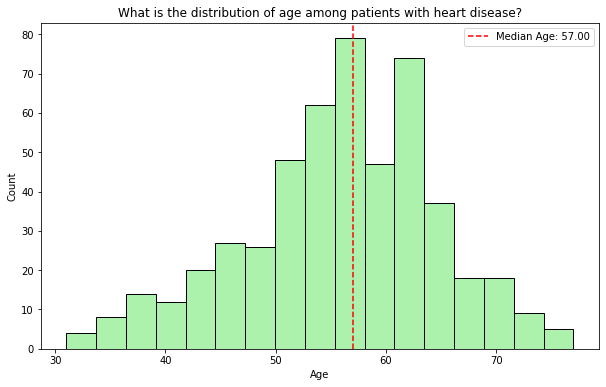

In [11]:
#filtering only the data of people having a heart disease
hd_data = df[df['HeartDisease'] == 1] 

#creating a figure to plot
fig, ax= plt.subplots(figsize=(10,6))
sns.histplot(data=hd_data, x='Age', kde=False, color='lightgreen', ax=ax)

#adding a vertical line for median age 
median_age = hd_data['Age'].median() 
plt.axvline(median_age, color='red', linestyle='--', label=f'Median Age: {median_age:.2f}')

#adding axis to the plot
plt.legend() 
plt.xlabel('Age') 
plt.ylabel('Count') 
plt.title('What is the distribution of age among patients with heart disease?', wrap=True); 

2. What is the gender distribution of the patients in the dataset?
    * This visualization will help us understand the gender distribution of the patients in the dataset and identify any potential gender-based patterns or trends.
    * we can see that our data tends to be skewed toward males
    * In addition male are more propense to have a heart disease

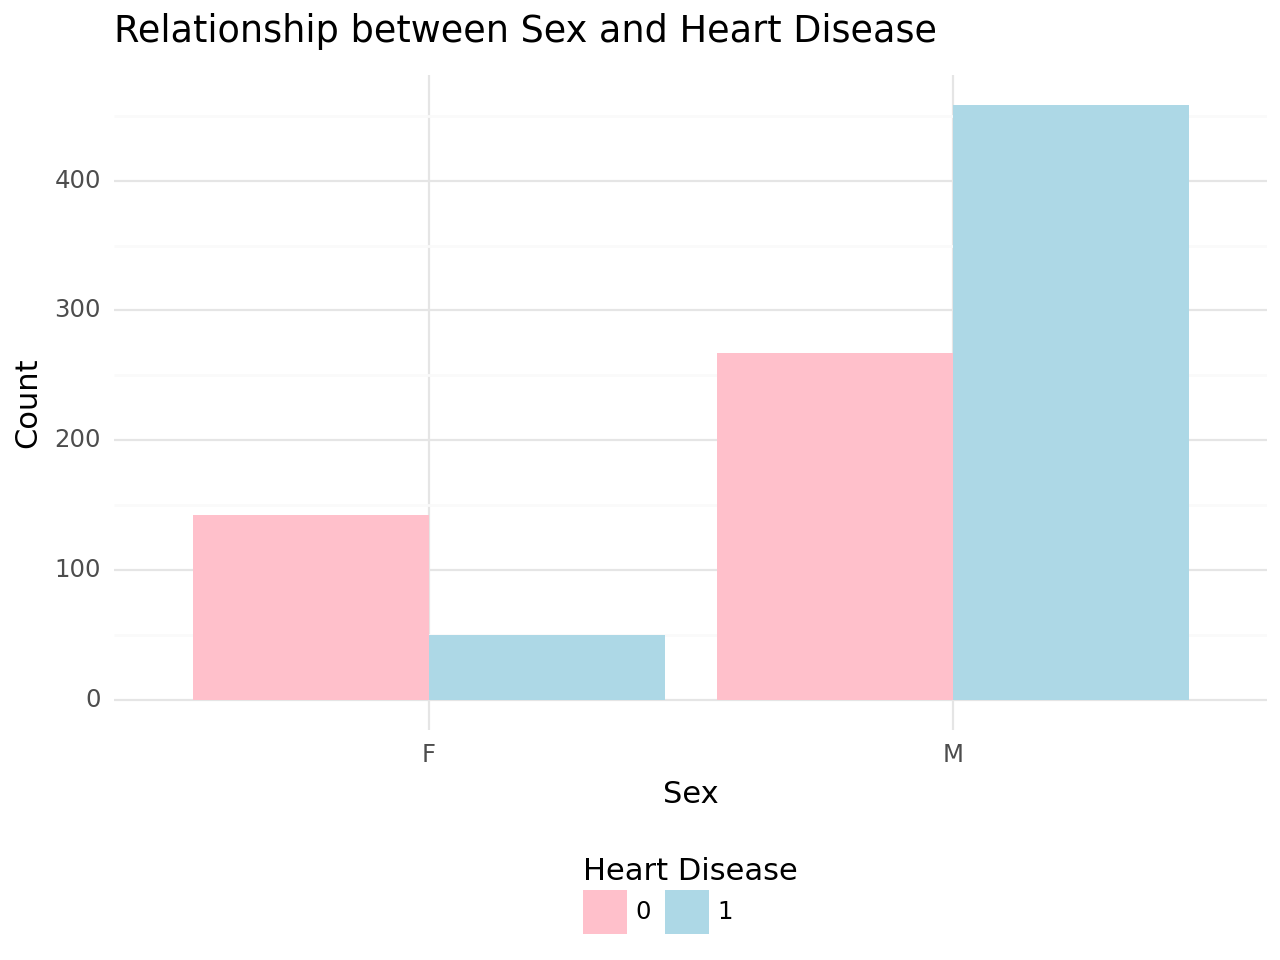

<Figure Size: (640 x 480)>

In [12]:
def plotting(df, column):
     return (p9.ggplot(df, p9.aes(x=column, fill='factor(HeartDisease)')) + 
             p9.geom_bar(position='dodge') + 
             p9.labs(title=f'Relationship between {column} and Heart Disease', 
                     x=column, y='Count', fill='Heart Disease') +
             p9.theme(axis_text_x=p9.element_text(angle=45, hjust=1)) + 
             p9.scale_fill_manual(values=['#FFC0CB', '#ADD8E6']) + 
             p9.theme_minimal() + p9.theme(legend_position='bottom')) 
    
plotting(df, 'Sex')

3. What is the distribution of Chest Pain Type in the dataset?
    * This visualization will help us understand the distribution of chest pain types among the patients in the dataset and identify any potential patterns or trends.
    * we can see that the chest pain of ASY is mostly related to a heart disease. TA is also 50% likely of having a heart disease

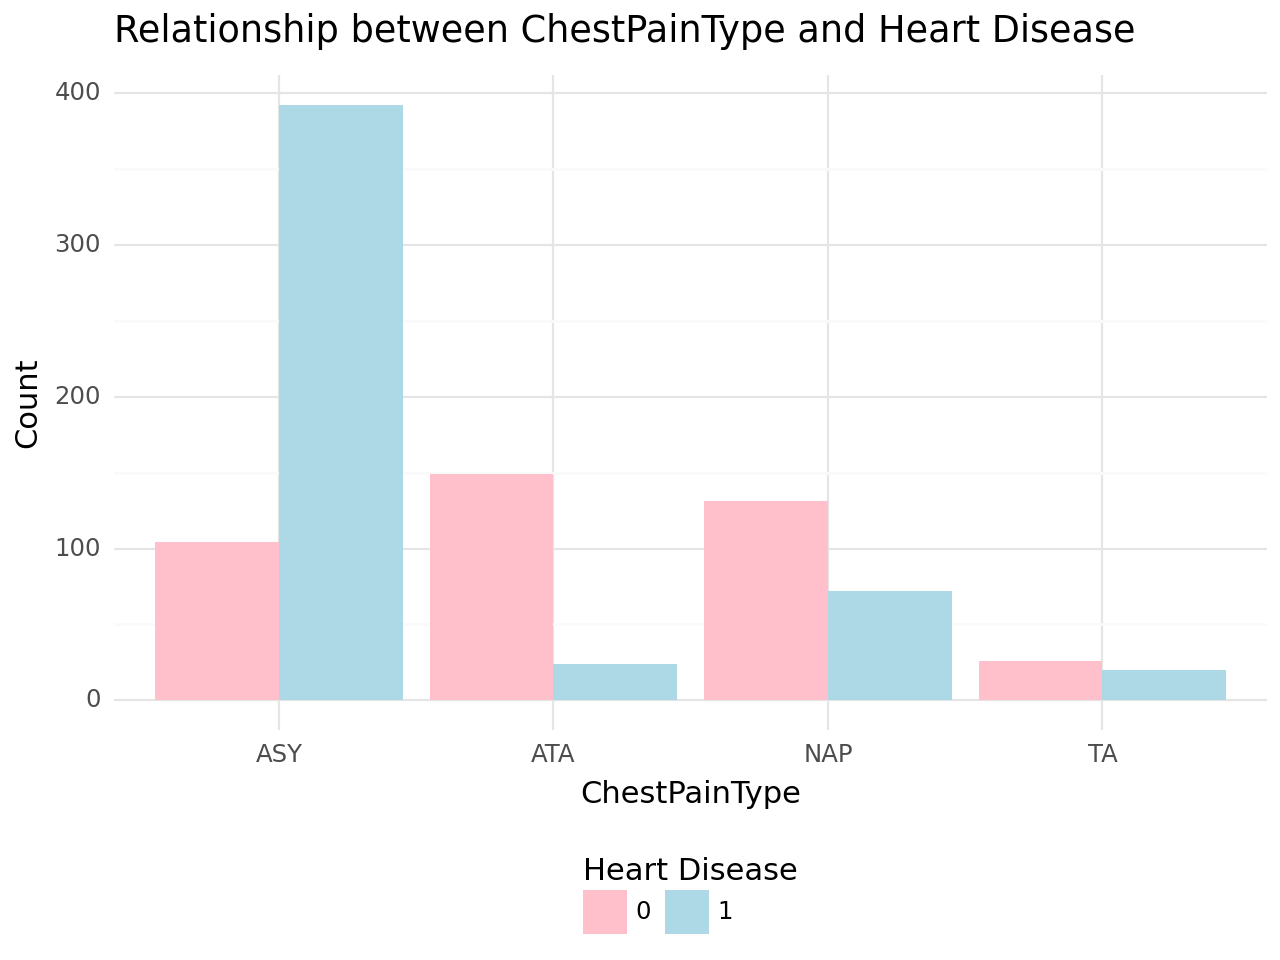

<Figure Size: (640 x 480)>

In [13]:
plotting(df, 'ChestPainType')

4. What is the relationship between exercise-induced angina and heart disease?
    * This visualization will help us understand the relationship between exercise-induced angina and heart disease. It will help us identify if there is a correlation between the two variables and if exercise-induced angina can be used as a predictor for heart disease.
    * we can see that people tend to have a heart disease more often when they have exercise-induced angina.



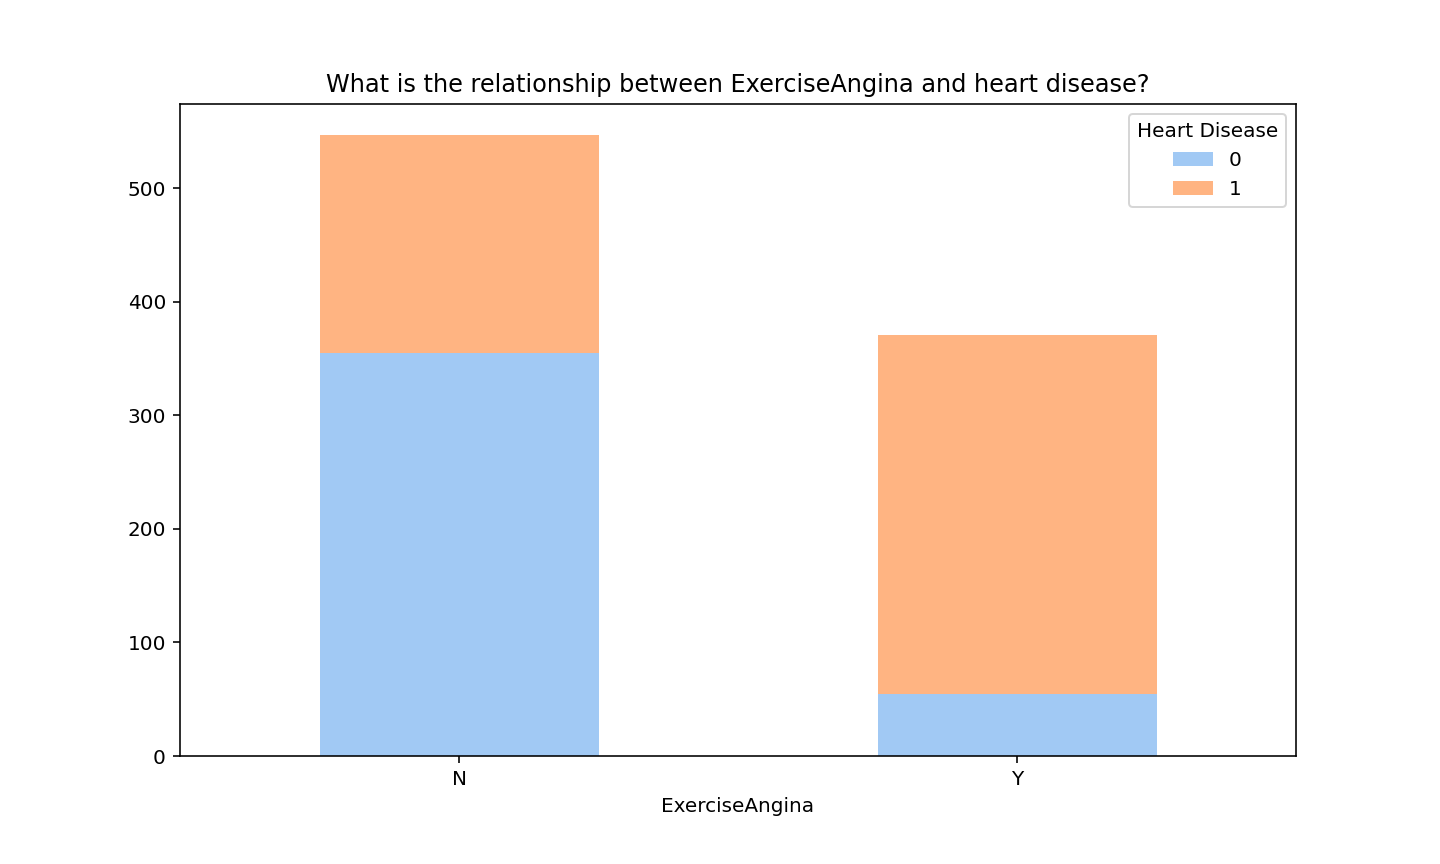

In [14]:
def plotting2(df, column):
    data = df[[column, 'HeartDisease']] 
    #group data by ExerciseAngina and HeartDisease columns and count the number of occurrences 
    data = data.groupby([column, 'HeartDisease']).size().reset_index(name='count') 
    # pivot data to create a stacked bar chart 
    data = data.pivot(index= column, columns='HeartDisease', values='count') 
    ax = data.plot(kind='bar', stacked=True, rot=0, color=sns.color_palette('pastel'),figsize=(10,6)) 
    ax.legend(title='Heart Disease', loc='upper right')
    plt.title(f'What is the relationship between {column} and heart disease?', wrap=True);
    return plt.show();
    
plotting2(df, 'ExerciseAngina')

5. What is the relationship between resting ECG  and heart disease?
    * This visualization will help us understand the relationship between resting ECG and heart disease. It will help us identify if there is a correlation between the two variables and if resting ECG can be used as a predictor for heart disease.
    * we can see that in general resting ECG is not as related to having a heart disease or not. IN all of the cases there is 50% of people having a heart disease and the other 50% not having a heart disease. Not the most correlated variable.

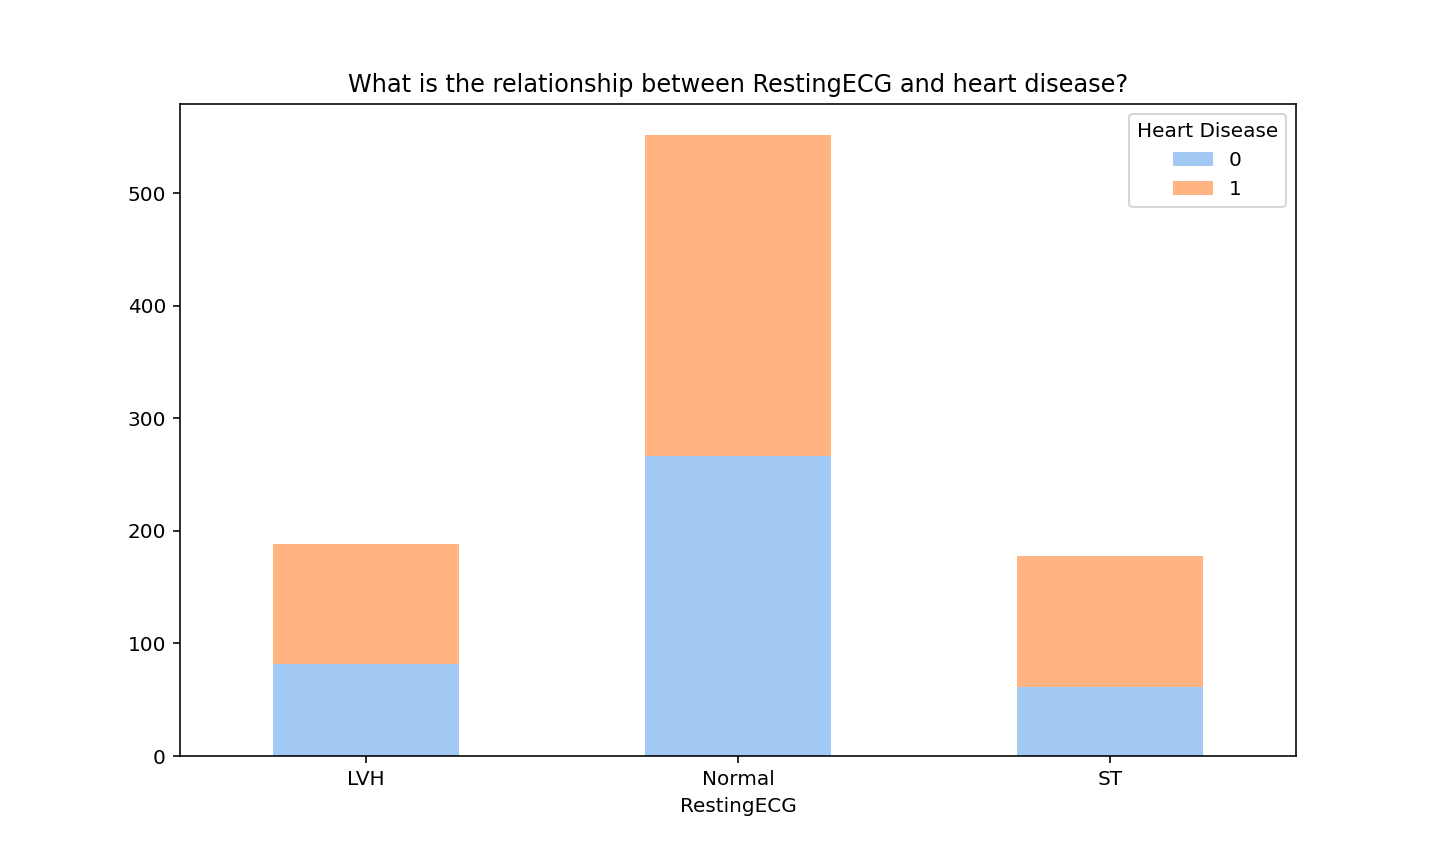

In [15]:
plotting2(df, 'RestingECG')

6. What is the relationship between ST_Slope  and heart disease?
    * This visualization will help us understand the relationship between ST_Slope and heart disease. It will help us identify if there is a correlation between the two variables and if ST_Slope can be used as a predictor for heart disease.
    * this variables are higly correlated. People that have a 'down' and 'flat' ST_Slope are the patients that tend to be more propense to have a heart disease.

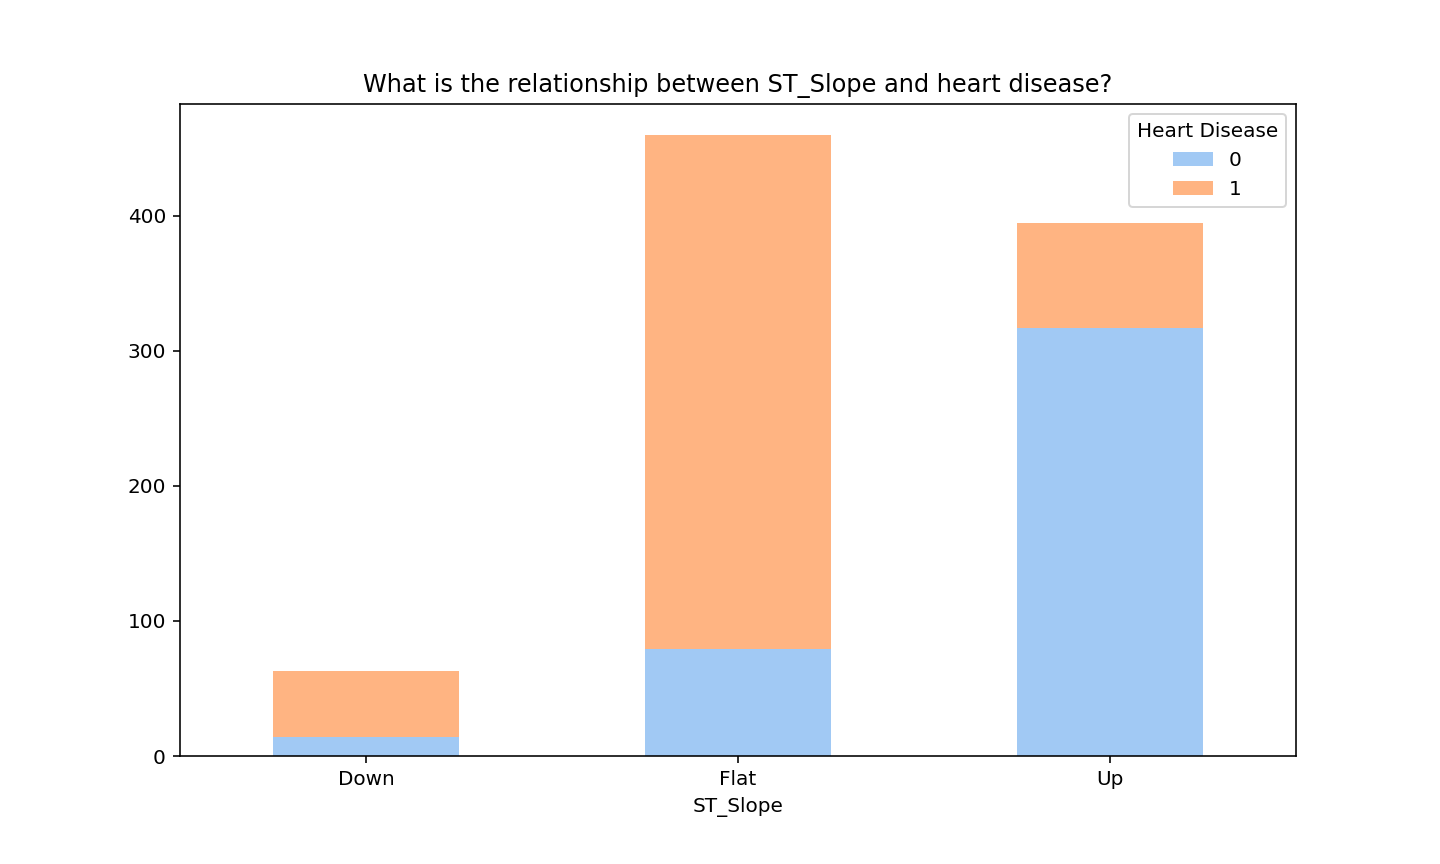

In [16]:
plotting2(df, 'ST_Slope')

7. What is the relationship between resting blood pressure and heart disease?
    * This visualization will help us understand the relationship between resting blood pressure and heart disease. It will help us identify if there is a correlation between the two variables and if resting blood pressure can be used as a predictor for heart disease.
    * we can see that this varibale is not that correlated either to having a heart disease or not.
    * However, people that have a higher resting blood pressure than the mean, tend to be more likely to have a heart disease. The same trend is going on with cholesterol. Not the most correlated variables in the dataset.
   

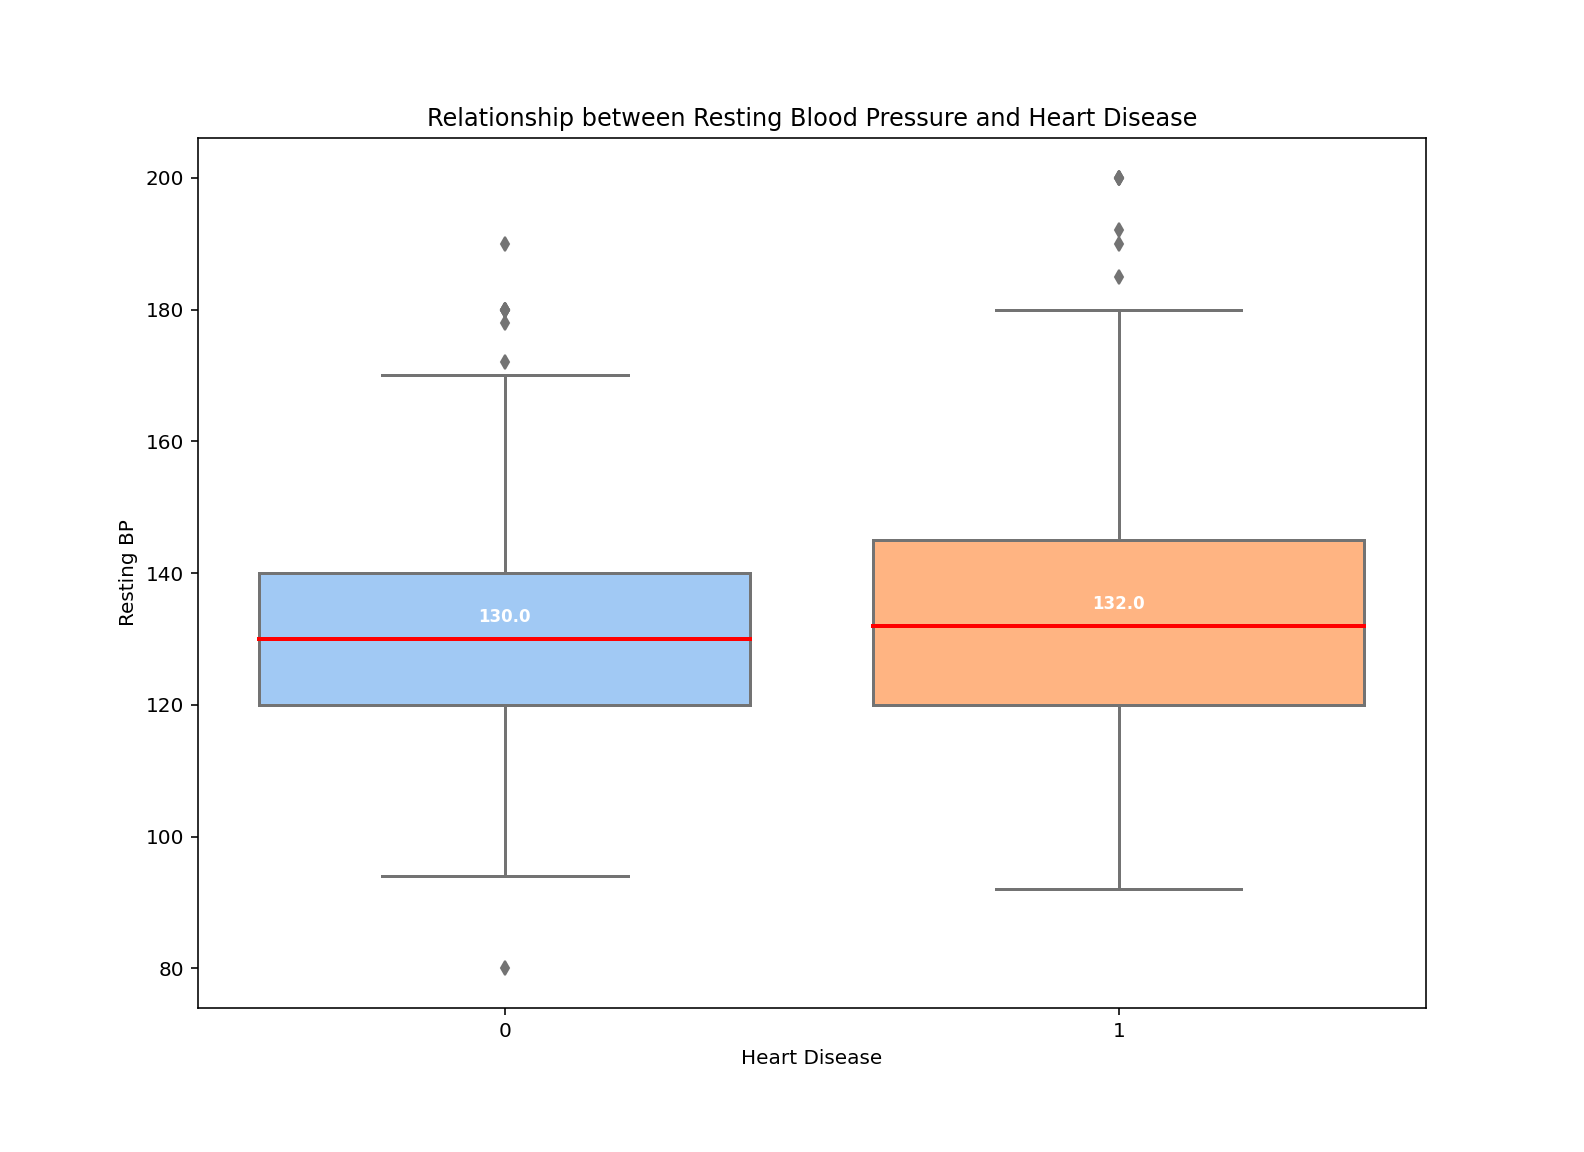

In [17]:
# (p9.ggplot(df, p9.aes(x='RestingBP', y='HeartDisease')) + 
#  p9.geom_point() + 
#  p9.labs(title='Relationship between Resting Blood Pressure and Heart Disease', x
#          ='Resting Blood Pressure', y='Heart Disease') + 
#  p9.theme(axis_text_x=p9.element_text(angle=90, hjust=1)) +
#  p9.geom_vline(xintercept=df['RestingBP'].median(), color='red', linetype='dashed', size=1.5) + 
#  p9.scale_x_continuous(breaks=range(80, 220, 10)) + p9.scale_y_continuous(breaks=[0, 1], 
#                                                                           labels=['No', 'Yes']) + 
#  p9.theme(panel_background=p9.element_rect(fill='white', color='black', size=0.5, linetype='solid'), 
#           panel_grid_major=p9.element_line(color='gray', size=0.5), 
#           panel_grid_minor=p9.element_blank(), 
#           axis_title=p9.element_text(size=10, weight='bold'), 
#           axis_text=p9.element_text(size=8), 
#           legend_title=p9.element_text(size=8, weight='bold'), 
#           legend_text=p9.element_text(size=8)) + 
#  p9.guides(color=p9.guide_legend(title='Heart Disease', override_aes={'shape': [16, 17]})) )

# size up plot
plt.figure(figsize=(11,8))
# take out outlier zero, take heart disease and RestingBP to create box and whisker; use redline to denote median
zero_set = df[df["RestingBP"] != 0]
bp_plot = sns.boxplot(data=zero_set, x = "HeartDisease", y = "RestingBP", palette = sns.color_palette('pastel'),
           saturation = 1, medianprops={"color": "r", "linewidth": 2})

# calculate median for display
medians = zero_set.groupby(['HeartDisease'])['RestingBP'].median()
vertical_offset = zero_set['RestingBP'].median() * 0.02 # offset from median for display

# add median values and label graph
for xtick in bp_plot.get_xticks():
    bp_plot.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='center',size='small',color='w',weight='semibold')
bp_plot = bp_plot.set(title = 'Relationship between Resting Blood Pressure and Heart Disease', xlabel = "Heart Disease",
                     ylabel = "Resting BP")


8. What is the distribution of maximum heart rate achieved among patients with heart disease?

    * This visualization will help us understand the distribution of maximum heart rate achieved among patients with heart disease. It will help us identify if there is a specific range of maximum heart rate achieved that is more common among patients with heart disease
    * The most common heart range for people that have a heart disease is around 120.  
    * The most common heart range for people that dont have a hear disease is around 175.
    * People with heart disease are shifted 

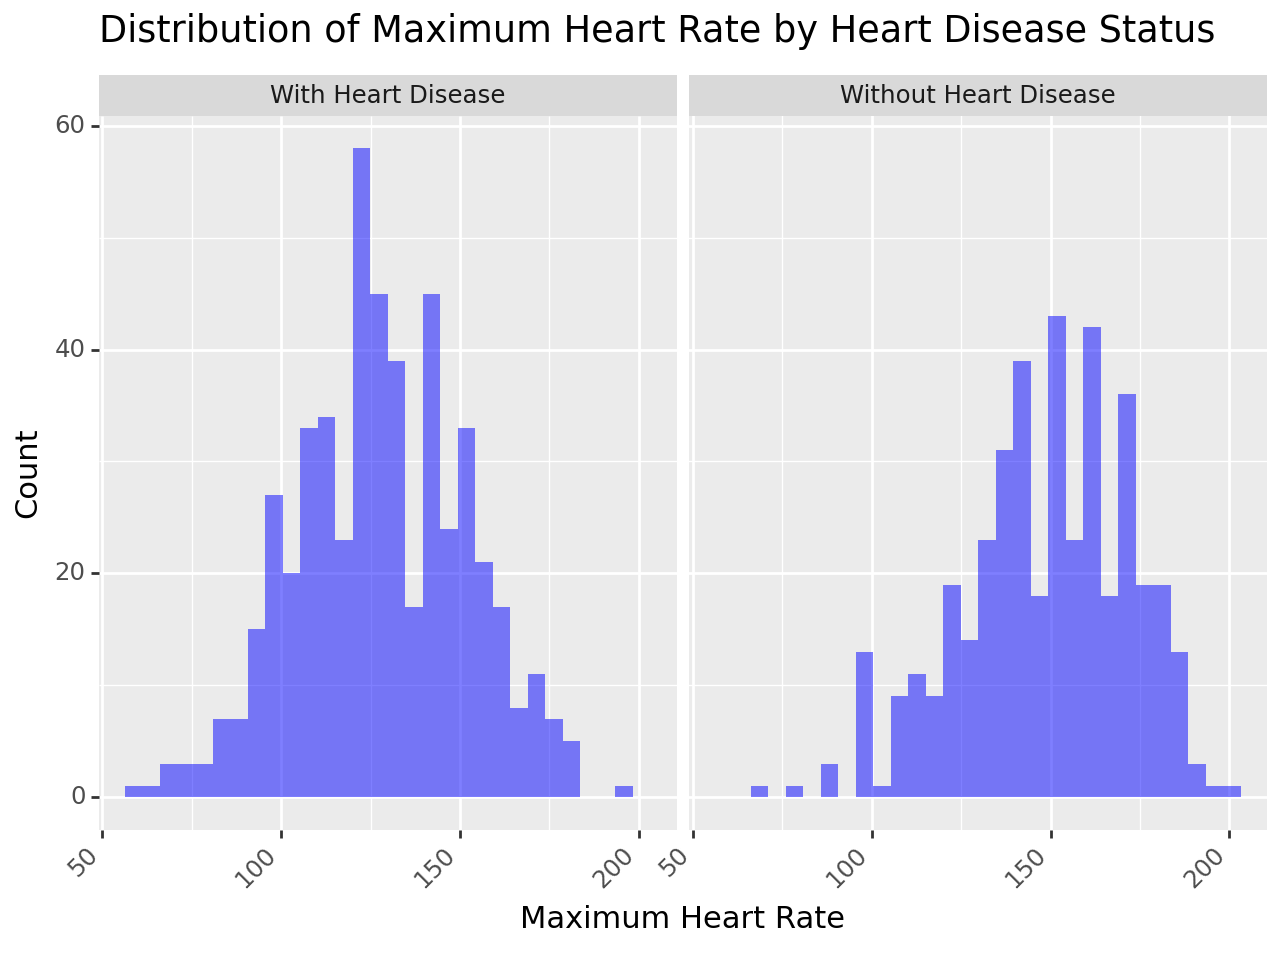

In [18]:
df['Group'] = df['HeartDisease'].map({1: 'With Heart Disease', 0: 'Without Heart Disease'})
plot = (
    p9.ggplot(df, p9.aes(x='MaxHR')) +
    p9.geom_histogram(bins=30, fill='blue', alpha=0.5) +
    p9.facet_wrap('~Group') + 
    p9.labs(title='Distribution of Maximum Heart Rate by Heart Disease Status',
            x='Maximum Heart Rate', y='Count') +
    p9.theme(axis_text_x=p9.element_text(angle=45, hjust=1))
)
print(plot)

9. What is the relationship between old peak and heart disease in the dataset?
    * This visualization will help us understand if the oldpeak value is related to the heart disease
    * If the old peak values lies outside the range [0,2.5] it is more likely to have a heart disease.

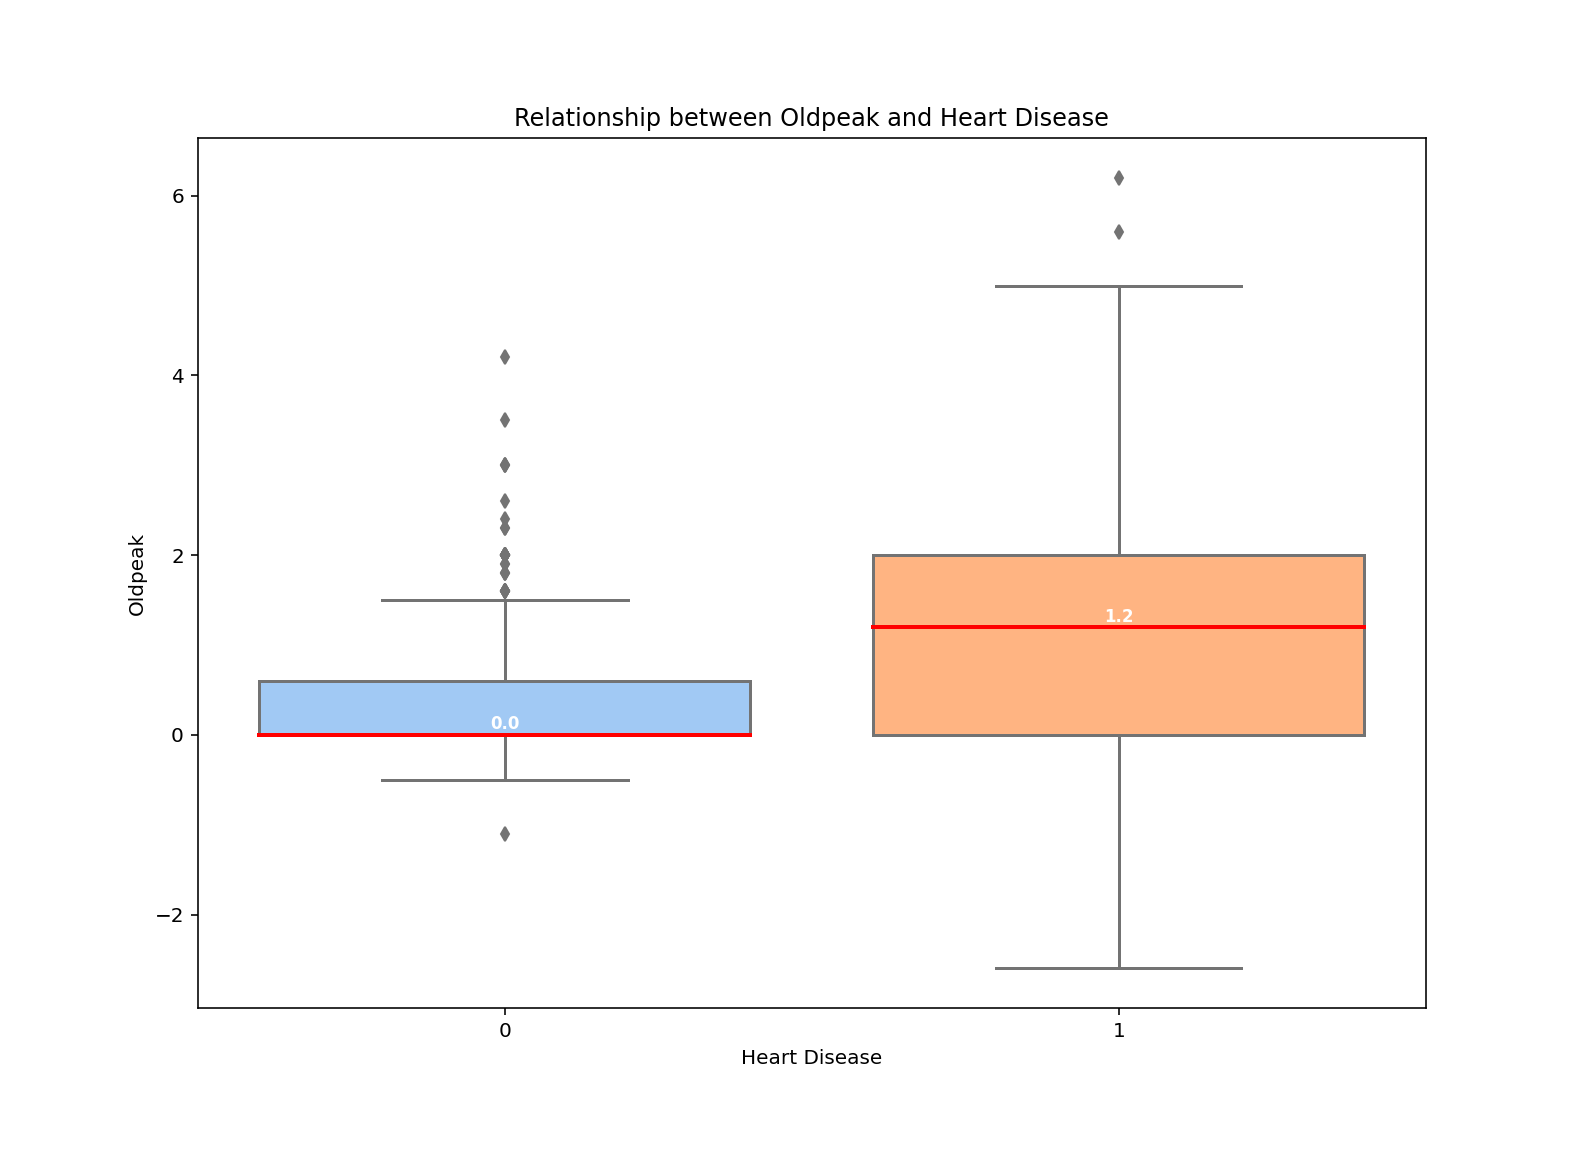

In [19]:
# (p9.ggplot(df, p9.aes(x='Oldpeak', y='HeartDisease')) + 
#  p9.geom_point() + 
#  p9.labs(title='Relationship between Oldpeak and Heart Disease', x
#          ='Oldpeak', y='Heart Disease') + 
#  p9.theme(axis_text_x=p9.element_text(angle=90, hjust=1)) +
#  p9.geom_vline(xintercept=0, color='red', linetype='dashed', size=.5) + 
#  p9.geom_vline(xintercept=2, color='red', linetype='dashed', size=.5) + 
#  p9.scale_x_continuous(breaks=range(-2, 6, 1)) + p9.scale_y_continuous(breaks=[0, 1], 
#                                                                           labels=['No', 'Yes']) + 
#  p9.theme(panel_background=p9.element_rect(fill='white', color='black', size=0.5, linetype='solid'), 
#           panel_grid_major=p9.element_line(color='gray', size=0.5), 
#           panel_grid_minor=p9.element_blank(), 
#           axis_title=p9.element_text(size=10, weight='bold'), 
#           axis_text=p9.element_text(size=8), 
#           legend_title=p9.element_text(size=8, weight='bold'), 
#           legend_text=p9.element_text(size=8)) + 
#  p9.guides(color=p9.guide_legend(title='Heart Disease', override_aes={'shape': [16, 17]})) )

# size up plot
plt.figure(figsize=(11,8))
# take heart disease and Oldpeak to create box and whisker; use redline to denote median
bp_plot = sns.boxplot(data=df, x = "HeartDisease", y = "Oldpeak", palette = sns.color_palette('pastel'),
           saturation = 1, medianprops={"color": "r", "linewidth": 2})

# calculate median for display
medians = df.groupby(['HeartDisease'])['Oldpeak'].median()
# print(df[df['HeartDisease'] == 0]['Oldpeak'].median()) #0.0
vertical_offset = df['Oldpeak'].median() * 0.10 # offset from median for display

# add median values and label graph
for xtick in bp_plot.get_xticks():
    bp_plot.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='center',size='small',color='w',weight='semibold')
bp_plot = bp_plot.set(title = 'Relationship between Oldpeak and Heart Disease', xlabel = "Heart Disease",
                     ylabel = "Oldpeak")

Checking to see if our variables are correlated
 *  the variables that are mostly correlated:
    * old_peak with heart disease
    * age and oldpeak
    * age with heart diseases
    * heart disease with the maximum heartbeat

We can conclude that the features that affect the most in wether a patient has a heart disease are: old peak, age, and heartbeats


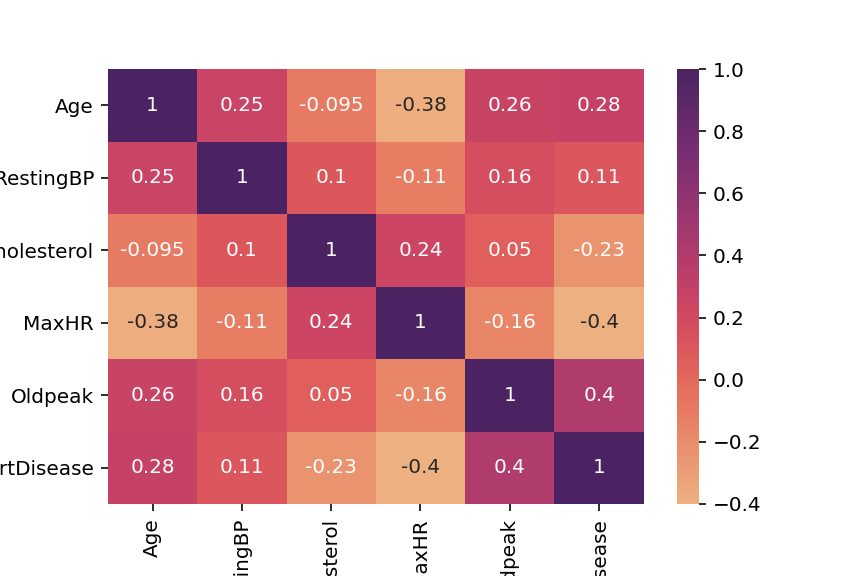

In [20]:
#we must only take intro consideration variables that are numerical
df1=df[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak','HeartDisease']]

#creating the correlation matrix
corr_matrix=df1.corr()

#creating the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap="flare");

# Preparing the Data

In [21]:
#Definig the features and the target variable
df.drop(columns='Group', axis=1, inplace=True)
y=df['HeartDisease']
X=df.drop(columns=['HeartDisease'],axis=1)
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up


In [55]:
import statsmodels
print("statsmodels:", statsmodels.__version__)

import pydeseq2
print("pydeseq2:", pydeseq2.__version__)
import xgboost
print("px:", xgboost.__version__)


statsmodels: 0.14.0
pydeseq2: 0.4.3
px: 1.2.1


In [22]:
#splitting the data
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=11)

In [26]:
def data_preparation(X_train):
    """
    Input: A set of Data
    Output: Return a standarized data frame where all categorical columns have been changed to numerical 
    
    """
    # Define numerical and categorical columns
    numerical_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'FastingBS']
    categorical_columns = ['Sex', 'ChestPainType', 'ExerciseAngina', 'ST_Slope', 'RestingECG']

    # Create a column transformer
    col_transformer = ColumnTransformer(transformers=[
        ("ohe", OneHotEncoder(categories="auto", handle_unknown="ignore"), categorical_columns)
    ], remainder="passthrough")

    # Create a pipeline containing the single column transformer
    pipe = Pipeline(steps=[
    ("col_transformer",col_transformer),
    ("scale", StandardScaler())
    ])

    # Use the pipeline to fit and transform the data
    transformed_data = pipe.fit_transform(X_train)

    # Extract the category labels from the OHE within the pipeline
    encoder = col_transformer.named_transformers_["ohe"]
    print(encoder)
#     category_labels = encoder.get_feature_names(categorical_columns)
    category_labels = encoder.get_feature_names_out(categorical_columns)
    # Combine category labels with numerical columns
    column_names = np.append(category_labels, numerical_columns)

    # Make a dataframe with the relevant columns and rename columns
    transformed_df = pd.DataFrame(transformed_data, columns=column_names)
    
    #remove the columns that are correlated due to the dummy variable
    transformed_df=transformed_df.drop(columns=['Sex_F', 'ChestPainType_ASY', 'ExerciseAngina_N', 'ST_Slope_Down', 'RestingECG_Normal'], axis=1)

    # Rename one-hot encoded columns with original categorical column names
    return transformed_df

In [27]:
train_df=data_preparation(X_train)
test_df=data_preparation(X_test)
test_df.head()

OneHotEncoder(handle_unknown='ignore')
OneHotEncoder(handle_unknown='ignore')


,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,RestingECG_LVH,RestingECG_ST,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,FastingBS
0,0.543852,1.993232,-0.484664,-0.167132,-0.906522,1.0,-0.829502,-0.560612,-0.476095,-1.385627,0.088211,0.080863,-0.510171,-0.109374,-0.750448
1,0.543852,-0.501698,-0.484664,-0.167132,1.103117,-1.0,1.205543,1.783765,-0.476095,-0.285259,0.322083,0.577967,-0.510171,1.910595,-0.750448
2,0.543852,-0.501698,-0.484664,-0.167132,-0.906522,1.0,-0.829502,-0.560612,-0.476095,-1.715738,0.088211,-1.658999,1.960129,0.563949,-0.750448
3,0.543852,-0.501698,2.063284,-0.167132,1.103117,1.0,-0.829502,-0.560612,-0.476095,-1.275590,-0.613407,0.295132,-0.510171,0.638763,0.617607
4,0.543852,-0.501698,-0.484664,-0.167132,-0.906522,1.0,-0.829502,-0.560612,-0.476095,1.475331,-0.379535,0.517971,1.960129,1.050238,-0.568040


In [ ]:
#do feature importance

# Logistic Regression Model

In [32]:
#creating parameters for randomize search
random_params ={'C': np.logspace(-5,5,25),
                'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}

np.random.seed(100)

In [33]:

# Define our random search for parameter tuning
randomsearch = RandomizedSearchCV(LogisticRegression(),
                                  param_distributions=random_params, 
                                  scoring='accuracy', 
                                  cv=5,
                                  n_iter=20,
                                  verbose=True)
#fitting the data
randomsearch.fit(train_df, y_train)
randomsearch.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


{'solver': 'newton-cholesky', 'C': 0.00825404185268019}

In [30]:
#evaluating the best model
randomsearch.score(test_df, y_test)

0.8260869565217391

In [34]:
#creating and fitting the model
model_0=LogisticRegression(solver="newton-cholesky", C= 0.00825404185268019)
model_0.fit(train_df, y_train)

LogisticRegression(C=0.00825404185268019, solver='newton-cholesky')

In [35]:
#checking the coefficients correlation with terms of the target
#matching our coefficients to the feature columns
features_dict=dict(zip(train_df.columns, list(model_0.coef_[0])))
features_dict

{'Sex_M': 0.2442693005795078,
 'ChestPainType_ATA': -0.2935230311684866,
 'ChestPainType_NAP': -0.23950578125355776,
 'ChestPainType_TA': -0.09487357197435634,
 'ExerciseAngina_Y': 0.3225221171448147,
 'ST_Slope_Flat': 0.367091375309307,
 'ST_Slope_Up': -0.3697417623809396,
 'RestingECG_LVH': 0.03325678481279307,
 'RestingECG_ST': 0.05695083451988973,
 'Age': 0.10969996780538446,
 'RestingBP': 0.023609319804772034,
 'Cholesterol': -0.17827429046362286,
 'MaxHR': 0.2074412968158769,
 'Oldpeak': -0.2037189347391906,
 'FastingBS': 0.26026790190604404}

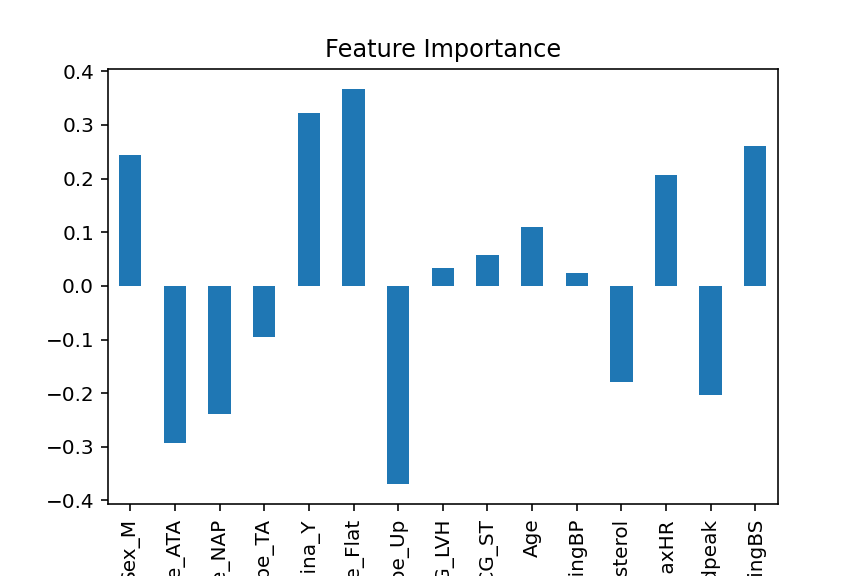

In [36]:
#visualizing feature importance
features_df=pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title= 'Feature Importance', legend=False);

In [37]:
train_df.head()

,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,RestingECG_LVH,RestingECG_ST,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,FastingBS
0,0.508925,-0.476891,-0.544812,-0.243235,-0.803579,-1.002729,1.137431,-0.494032,-0.494032,1.210180,-0.689980,-0.215267,-0.561616,0.108323,-0.476118
1,0.508925,-0.476891,-0.544812,-0.243235,1.244432,-1.002729,-0.879174,-0.494032,-0.494032,-1.628757,-1.254768,0.827924,-0.561616,-1.286577,0.563973
2,0.508925,-0.476891,-0.544812,-0.243235,-0.803579,-1.002729,1.137431,-0.494032,-0.494032,-0.261862,-0.125192,-1.863882,1.780577,1.303952,-1.516210
3,-1.964924,-0.476891,-0.544812,-0.243235,1.244432,0.997279,-0.879174,-0.494032,-0.494032,0.894742,1.004384,0.408785,-0.561616,0.666283,0.469420
4,-1.964924,-0.476891,-0.544812,-0.243235,-0.803579,0.997279,-0.879174,-0.494032,-0.494032,1.105034,-0.125192,0.958323,-0.561616,-0.609054,1.036742


In [38]:
#using the model but only with the selected features. 
#We select feature only having where the abs value is 0.25 or above.
feature_importance_train=train_df.drop(columns=['RestingECG_LVH','RestingECG_ST','Age','RestingBP','Cholesterol'])
feature_importance_test=test_df.drop(columns=['RestingECG_LVH','RestingECG_ST','Age','RestingBP','Cholesterol'])
model_1=LogisticRegression(solver='newton-cg', C= 0.00825404185268019)
model_1.fit(feature_importance_train, y_train)

LogisticRegression(C=0.00825404185268019, solver='newton-cg')

In [39]:
model_1.score(feature_importance_test, y_test)


0.8369565217391305

In [43]:
X_train.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
620,65,M,ASY,120,177,0,Normal,140,N,0.4,Up
568,38,M,ASY,110,289,0,Normal,105,Y,1.5,Down
334,51,M,ASY,130,0,1,Normal,170,N,-0.7,Up
776,62,F,ASY,150,244,0,Normal,154,Y,1.4,Flat
768,64,F,ASY,130,303,0,Normal,122,N,2.0,Flat


# XGBoost

In [206]:
from xgboost import XGBClassifier

# increase in learning rate fluctuates, some tradeoff between accuracy and recall, alpha under 0.2 can boost recall but 
# overdoing alpha kills accuracy in name of recall, increasing reg_lambda also increase recall
model_xg = XGBClassifier(booster = 'gblinear', learning_rate = 0.3, reg_alpha = 0.03, reg_lambda = 0.8)
model_xg.fit(train_df, y_train)
y_pred = model_xg.predict(test_df)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("fbeta:", metrics.fbeta_score(y_test, y_pred, average="weighted", beta=0.5))

Accuracy: 0.8260869565217391
Precision: 0.7863247863247863
Recall: 0.9292929292929293
fbeta: 0.8291055470511068


In [210]:
features_dict=dict(zip(train_df.columns, list(model_xg.coef)))
#visualizing feature importance
features_df=pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title= 'Feature Importance', legend=False);
# plot_importance(model_xg, max_num_features=15, importance_type="weight")
# plt.rcParams['figure.figsize'] = (40,10)
# plt.show()

TypeError: 'numpy.float64' object is not iterable